<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/imdb_sentiment_analysis_keras_and_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **This kernel is based on one of the exercises in the excellent book: [Deep Learning with Python by Francois Chollet](https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438)
**
* The kernel imports the IMDB reviews (originally text - already transformed by Keras to integers using a dictionary)
* Vectorizes and normalizes the data
* Compiles a multi layers NN
* Monitors the learning / validation curves for loss and accuracy
* Try and error with different layers and hidden units
* Employs L1 and L2 weight regularization
* Implements a DROPOUT layer

* The above mentioned book is a **MUST READ**.
* *Thanks Francois for an amazing book !*

In [1]:
# IMPORT MODULES
# TURN ON the GPU !!!
# If importing dataset from outside - like this IMDB - Internet must be "connected"

import os
from operator import itemgetter    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
 
from keras.datasets import imdb

print(os.getcwd())
print("Modules imported \n")
print("Files in current directory:")
from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

/content
Modules imported 

Files in current directory:


In [2]:
# LOAD IMDB DATA

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [3]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [4]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY (given by keras...need to do nothing to create it)

word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

1646592/1641221 [==============================] - 0s 0us/step
? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [5]:
# VECTORIZE as one cannot feed integers into a NN 
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix) of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [6]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)

x_train  (25000, 10000)
x_test  (25000, 10000)


In [7]:
# VECTORIZE the labels too - NO INTEGERS only floats into a tensor...(rare exceptions)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

y_train  (25000,)
y_test  (25000,)


In [8]:
# Set a VALIDATION set

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

print("x_val ", x_val.shape)
print("partial_x_train ", partial_x_train.shape)
print("y_val ", y_val.shape)
print("partial_y_train ", partial_y_train.shape)

x_val  (10000, 10000)
partial_x_train  (15000, 10000)
y_val  (10000,)
partial_y_train  (15000,)


In [9]:
# NN MODEL

# Use of DROPOUT
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001),activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Use of REGULARIZATION
#model = models.Sequential()
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

# REGULARIZERS L1 L2
#regularizers.l1(0.001)
#regularizers.l2(0.001)
#regularizers.l1_l2(l1=0.001, l2=0.001)

# OPTIMIZERS
#model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])
#model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
# FIT / TRAIN model

NumEpochs = 10
BatchSize = 512

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(partial_x_train, partial_y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Epoch 1/10
30/30 [==============================] - 5s 44ms/step - loss: 1.5997 - acc: 0.5626 - val_loss: 0.7820 - val_acc: 0.7388
Epoch 2/10
30/30 [==============================] - 1s 20ms/step - loss: 0.7796 - acc: 0.7065 - val_loss: 0.7129 - val_acc: 0.8143
Epoch 3/10
30/30 [==============================] - 1s 19ms/step - loss: 0.7401 - acc: 0.7474 - val_loss: 0.6532 - val_acc: 0.8550
Epoch 4/10
30/30 [==============================] - 1s 20ms/step - loss: 0.6978 - acc: 0.7799 - val_loss: 0.6217 - val_acc: 0.8552
Epoch 5/10
30/30 [==============================] - 1s 19ms/step - loss: 0.6734 - acc: 0.8062 - val_loss: 0.6235 - val_acc: 0.8379
Epoch 6/10
30/30 [==============================] - 1s 21ms/step - loss: 0.6594 - acc: 0.8088 - val_loss: 0.6070 - val_acc: 0.8393
Epoch 7/10
30/30 [==============================] - 1s 21ms/step - loss: 0.6471 - acc: 0.8130 - val_loss: 0.5686 - val_acc: 0.8641
Epoch 8/10
30/30 [==============================] - 1s 20ms/step - loss: 0.6364 - a

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

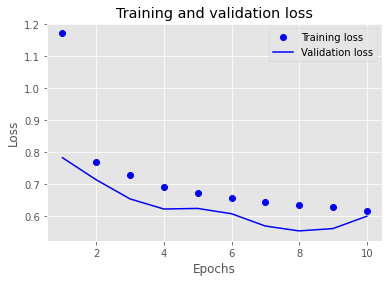

In [11]:
# VALIDATION LOSS curves

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

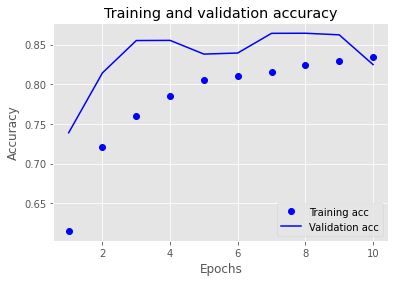

In [12]:
# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, (len(history_dict['acc']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# PREDICT

model.predict(x_test)

array([[0.37082058],
       [0.94849527],
       [0.87193114],
       ...,
       [0.15793328],
       [0.13146116],
       [0.5678086 ]], dtype=float32)